Name: Deep Salunkhe
---
Roll no.:21102A0014

---

## **Image Classification Using Convolutional Neural Networks (CNNs)**  

### **1. Introduction**  
Image classification is a fundamental task in computer vision where a machine learning model learns to categorize images into different classes. Traditional machine learning methods require extensive feature engineering, but deep learning, particularly **Convolutional Neural Networks (CNNs)**, can automatically extract important features from images.  

In this lab, we will implement a CNN using **TensorFlow and Keras** to classify images from the **CIFAR-10 dataset**.  

---

### **2. Dataset Overview: CIFAR-10**  
- **CIFAR-10** is a popular dataset used for object recognition.  
- It consists of **60,000 images (32x32 pixels, color)** divided into **10 classes**:  
  **airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck**.  
- The dataset is already preprocessed and split into:  
  - **Training set:** 50,000 images  
  - **Test set:** 10,000 images  

---

### **3. What is a Convolutional Neural Network (CNN)?**  
A **CNN** is a deep learning architecture designed specifically for analyzing visual data. It consists of multiple layers that help extract meaningful patterns from images. The key components of a CNN include:  

#### **a) Convolutional Layers**  
- These layers apply filters to the input image to detect **edges, textures, and shapes**.  
- Each filter learns different features as the network gets deeper.  

#### **b) Activation Function (ReLU)**  
- The **ReLU (Rectified Linear Unit)** function introduces non-linearity, making the model capable of learning complex patterns.  

#### **c) Pooling Layers**  
- **Max pooling** reduces the spatial size of feature maps while retaining important information.  
- This helps in **reducing computation** and making the model more generalizable.  

#### **d) Fully Connected Layers**  
- After feature extraction, the **flattened output** is passed through dense (fully connected) layers.  
- The final layer uses a **softmax activation** to classify the image into one of the 10 classes.  

---

### **4. Model Training Process**
To train our CNN model, we will follow these steps:  
1. **Load the CIFAR-10 dataset** and normalize the image pixel values.  
2. **Define the CNN architecture** with convolutional, pooling, and fully connected layers.  
3. **Compile the model** with the Adam optimizer and cross-entropy loss function.  
4. **Train the model** for a specified number of epochs (5-10).  
5. **Evaluate the model** on test data to measure accuracy.  
6. **Make predictions** on test images and visualize the results.  

---

### **5. Implementation in Python (TensorFlow/Keras)**  
Now, we will implement our CNN step by step in Python using TensorFlow and Keras. 🚀  

---


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


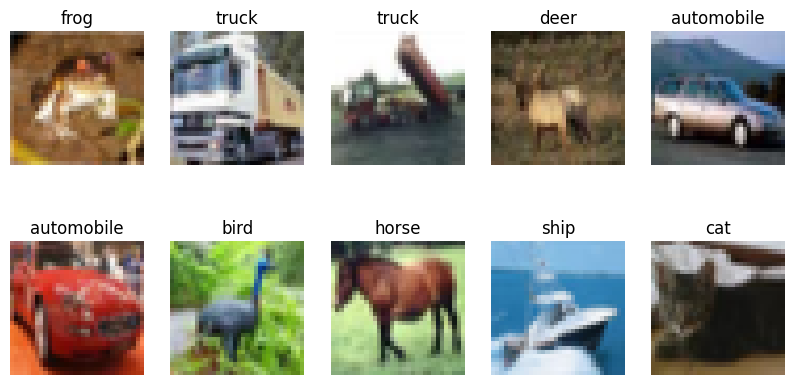

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values (0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class names
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Display sample images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()


In [2]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.3507 - loss: 1.7524 - val_accuracy: 0.5160 - val_loss: 1.3134
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.5902 - loss: 1.1526 - val_accuracy: 0.6323 - val_loss: 1.0277
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 30ms/step - accuracy: 0.6551 - loss: 0.9824 - val_accuracy: 0.6749 - val_loss: 0.9289
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.6969 - loss: 0.8613 - val_accuracy: 0.6547 - val_loss: 1.0006
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.7269 - loss: 0.7753 - val_accuracy: 0.6803 - val_loss: 0.9109


In [4]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 - 3s - 8ms/step - accuracy: 0.6803 - loss: 0.9109
Test Accuracy: 0.6803


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


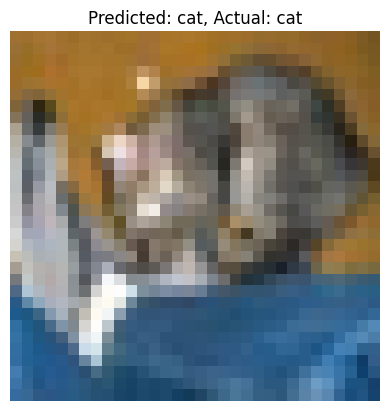

In [5]:
predictions = model.predict(x_test)

# Display a sample prediction
plt.imshow(x_test[0])
plt.title(f"Predicted: {class_names[np.argmax(predictions[0])]}, Actual: {class_names[y_test[0][0]]}")
plt.axis("off")
plt.show()


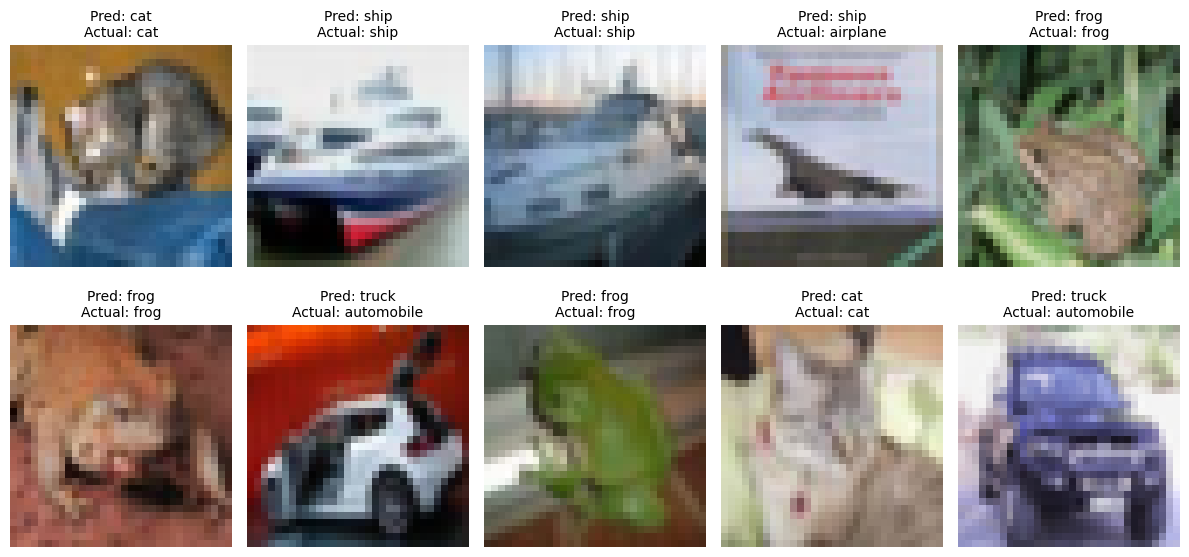

In [6]:
# Display first 10 images with predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    predicted_label = class_names[np.argmax(predictions[i])]
    actual_label = class_names[y_test[i][0]]
    plt.title(f"Pred: {predicted_label}\nActual: {actual_label}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()